<a href="https://colab.research.google.com/github/pranaydarode/Boston-House-Pricing-Trained-Model/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dependencies**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

loading dataset to pandas dataframe

In [7]:
house_price_dataset = pd.read_csv('/content/House Pricing Dataset.csv')

In [9]:
print(house_price_dataset)

        CRIM    ZN  INDUS   CHAS    NOX     RM  ...  RAD  TAX  PTRATIO       B  LSTAT  Price
0    0.00632  18.0    2.31     0  0.538  6.575  ...    1  296     15.3  396.90   4.98   24.0
1    0.02731   0.0    7.07     0  0.469  6.421  ...    2  242     17.8  396.90   9.14   21.6
2    0.02729   0.0    7.07     0  0.469  7.185  ...    2  242     17.8  392.83   4.03   34.7
3    0.03237   0.0    2.18     0  0.458  6.998  ...    3  222     18.7  394.63   2.94   33.4
4    0.06905   0.0    2.18     0  0.458  7.147  ...    3  222     18.7  396.90   5.33   36.2
..       ...   ...     ...   ...    ...    ...  ...  ...  ...      ...     ...    ...    ...
501  0.06263   0.0   11.93     0  0.573  6.593  ...    1  273     21.0  391.99   9.67   22.4
502  0.04527   0.0   11.93     0  0.573  6.120  ...    1  273     21.0  396.90   9.08   20.6
503  0.06076   0.0   11.93     0  0.573  6.976  ...    1  273     21.0  396.90   5.64   23.9
504  0.10959   0.0   11.93     0  0.573  6.794  ...    1  273     21.0

In [10]:
#printing first five rows of dataframe
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
house_price_dataset.shape

(506, 14)

In [12]:
#checking the missing values
house_price_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [13]:
#statistical measures of the dataset
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correleation between various features of dataset

In [14]:
correlation = house_price_dataset.corr()

<Axes: >

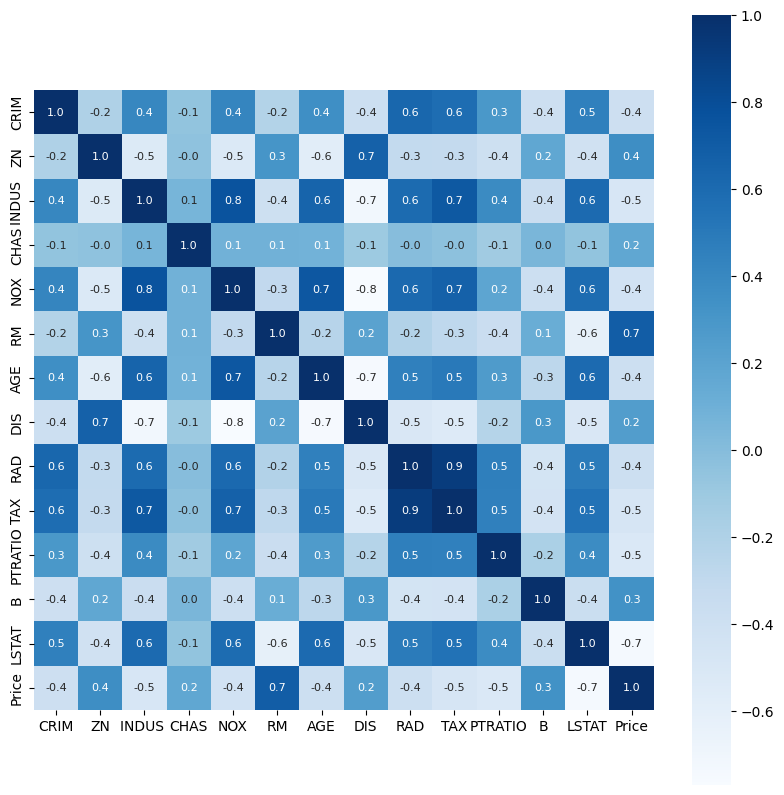

In [17]:
#heatmap constructionto understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True , square=True , fmt='.1f' , annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data into target and other data

In [19]:
X = house_price_dataset.drop(['Price'], axis=1)
Y = house_price_dataset['Price']

In [21]:
print(X)
print(Y)

        CRIM    ZN  INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO       B  LSTAT
0    0.00632  18.0    2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   4.98
1    0.02731   0.0    7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   9.14
2    0.02729   0.0    7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   4.03
3    0.03237   0.0    2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   2.94
4    0.06905   0.0    2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   5.33
..       ...   ...     ...   ...    ...    ...   ...     ...  ...  ...      ...     ...    ...
501  0.06263   0.0   11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0  391.99   9.67
502  0.04527   0.0   11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0  396.90   9.08
503  0.06076   0.0   11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0  396.90   5.64
504  0.10959   0.0   11.93     0  0.573  6.794  89

Splitting the data into test and train data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


Model Traning

XGBoost Regression

In [25]:
#loading model
model = XGBRegressor()

In [27]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluating the data for accuracy

In [28]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [29]:
print(training_data_prediction)

[25.287899  23.304115   7.203543  21.18787   11.712369  27.001377
 29.601633  26.501963  43.502502  23.609913  10.997985  33.40193
 35.998486  36.395298  19.011835  20.196331  34.899765  49.998886
 19.298422  14.8881445 26.610622  19.905317  24.798319  21.198807
 23.907646  20.584316  23.090736  27.999428  19.994778  23.093884
 25.001348   9.686624  23.905449  36.100372  13.402416  12.723068
 39.79885   10.400233  20.598919  17.77934   19.504488  23.694613
 28.506124  24.299711  23.786673  19.092104  28.388767  20.490433
 33.81244   14.507689  20.388994  16.001871  13.30335   30.790573
 27.492449  24.405096  24.39801   25.141434  43.815685  21.899052
 26.19648   14.208478  20.789291  20.100916  23.098286  13.083362
 16.18796   24.807959  20.201899  22.47833   14.804074  28.702394
 20.099424  23.400444  31.995035  19.11702   49.986347  20.898264
 21.688086  22.005064  17.201548  30.302023  12.282589  21.394003
 20.502174  35.20127   19.59359   22.004604  21.695543  14.104271
 21.090494 

In [30]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999985384297829
Mean Absolute Error :  0.007549762017656112


Visualizing the actual Prices and predicted prices

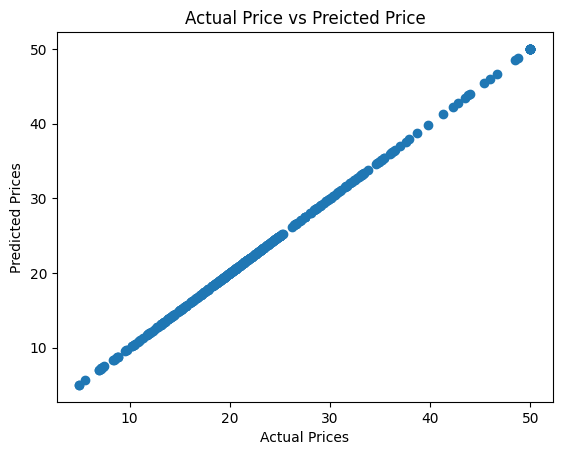

In [32]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [33]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [34]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9027718655671774
Mean Absolute Error :  2.2952071479722562


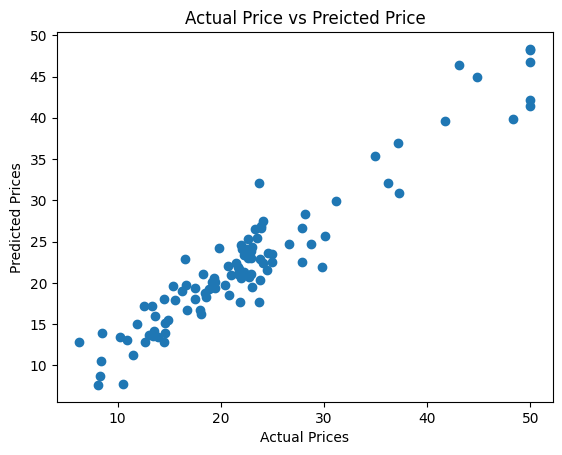

In [36]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()